#### 1. Dataset selected is stellar classification: 
> https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

#### 2. Description of features (ripped directly from kaggle)
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- class = object class (galaxy, star or quasar object)
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

#### Checklist:
> Pre-process and clean dataset.
> Use the following approaches for classification of dataset:
- - Logistic Regression
- - Decision Tree
- - Random Forest
- - SGD
- - SVM
>  GridSearchCV to tune the parameter of each of the above models. 
- - Better results obtained in this step for any models? 
- - Discuss observations.
> Remove some features and re-evaluate the models. 
- - Document observations with respect to models performances.
> Present findings.
- - Maximum of 15 mins.
- - DUE: September 23rd
> Written technical report.
- - Not longer than 15 pages.
- Every step involved in the project
- - Problem statement
- - Steps
- - Summary of findings
- - Conclusions
- Submit report and notebook
- - Notebook should have headings, explanatory comments, and code sections
- DUE: September 28th

In [4]:
# Import core things
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# import evaluators
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split

In [5]:
# load dataset
df=pd.read_csv("star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
# get the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
# get the shape
df.shape

(100000, 18)

In [5]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

> Are there any pieces of missing or null data?
- No. There is no missing or null data.
- This does not mean there is no *wrong* data

In [6]:
# see the main relevant info for the dataset
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
# get the classifications of the items 
# and how many are items attributed to each classification
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

> Are any items missing a classification?
- 59445 + 21594 + 18961 = 100,000
- No. Every item is classified

#### Preprocessing the dataset

In [6]:
# detect & remove outliers
def outliers(df_input):
    # get columns which are numeric
    num_df = df_input[["alpha","delta","u","g","r","i","z","redshift"]]
    # get quartiles for the columns
    Q1 = num_df.quantile(0.25)
    Q3 = num_df.quantile(0.75)
    # get interquartile range them
    IQR = Q3 - Q1
    # factory settings bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # get a mask of rows which finds rows with no outliers
    # if all numeric columns are within bounds, we keep the row
    is_not_outlier = (
        (num_df >= lower_bound) &
        (num_df <= upper_bound)
    ).all(axis=1)
    
    return df_input[is_not_outlier]

In [7]:
df = outliers(df)
# drop stuff
df_dropped = df.drop(["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "plate", "MJD", "fiber_ID", "spec_obj_ID"], axis=1)
df_dropped

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


#### Reasons 4 dropping
- obj_ID: just an object identifier, not needed for any purpose besides identifying row
- run_ID: do not think it will be useful for classifying any data
- rerun_ID: do not think it will be useful for classifying any data
- cam_col: do not think it will be useful for classifying any data
- field_ID: do not think it will be useful for classifying any data
- spec_obj_ID: do not think it will be useful for classifying any data
- plate: do not think it will be useful for classifying any data
- MJD: do not think it will be useful for classifying any data
- fiber_ID: do not think it will be useful for classifying any data

In [8]:
def train_evaluate_models(X, y):
    #Split Train/Test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Decision Tree Model
    # By Aswin
    dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=10, class_weight="balanced")
    dt_model.fit(X_train,y_train)
    y_pred_dt = dt_model.predict(X_test)
    # Evaluate
    dt_acc = accuracy_score(y_test, y_pred_dt)
    print("\nDecision Tree Accuracy:", dt_acc)
    dt_class = classification_report(y_test, y_pred_dt)
    print("\nClassification Report:\n", dt_class)
    dt_conf = confusion_matrix(y_test, y_pred_dt)
    print("\nConfusion Matrix:\n", dt_conf)
    
    # SGD Classifier
    # By Danylo Gula
    sgd_model = SGDClassifier(random_state=42, class_weight="balanced")
    sgd_model.fit(X_train_scaled, y_train)
    y_pred_sgd = sgd_model.predict(X_test_scaled)
    # Evaluate model
    sgd_acc = accuracy_score(y_test, y_pred_sgd)
    sgd_class = classification_report(y_test, y_pred_sgd)
    sgd_conf = confusion_matrix(y_test, y_pred_sgd)
    print("\nSGD Testing Accuracy:", sgd_acc)
    print("\nClassification Report:\n", sgd_class)
    print("\nConfusion Matrix:\n", sgd_conf)
    
    # Logistic Regression
    # By Karthik & Jessica Bowmaster
    log_reg_mn = LogisticRegression(max_iter=100, multi_class='multinomial', solver='newton-cg', random_state=42)
    log_reg_mn.fit(X_train_scaled, y_train)
    y_pred_log_mn = log_reg_mn.predict(X_test_scaled)
    # Evaluation
    log_mn_acc = accuracy_score(y_test, y_pred_log_mn)
    print("\nLogistic Regression (multinomial) Testing Accuracy:", log_mn_acc)
    log_mn_class = classification_report(y_test, y_pred_log_mn)
    print("\nClassification Report:", log_mn_class)
    log_conf = confusion_matrix(y_test, y_pred_log_mn)
    print("\nConfusion Matrix:\n", log_conf)
    # SVM Classifier
    # By Elizaveta
    svm_model = SVC(kernel='rbf', C=1.0, random_state=42, class_weight="balanced")
    svm_model.fit(X_train_scaled, y_train)
    y_pred_svm = svm_model.predict(X_test_scaled)
    svm_class = classification_report(y_test, y_pred_svm)
    svm_acc = accuracy_score(y_test, y_pred_svm)
    svm_conf = confusion_matrix(y_test, y_pred_svm)
    print("\nSVM Testing Accuracy:", svm_acc)
    print("\nClassification Report:", svm_class)
    print("\nConfusion Matrix:\n", svm_conf)
    # Random Forest
    # By Daria
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_class = classification_report(y_test, y_pred_rf)
    rf_acc = accuracy_score(y_test, y_pred_rf)
    rf_conf = confusion_matrix(y_test, y_pred_rf)
    rf_y_pred_proba = rf_model.predict_proba(X_test)
    print("\nRandom Forest Testing Accuracy:", rf_acc)
    print("\nClassification Report:", rf_class)
    print("\nConfusion Matrix:\n", rf_conf)
    rf_auc = roc_auc_score(y_test, rf_y_pred_proba, multi_class="ovr")
    print("\nAUC:", rf_auc)
    
    # Store the results of all models
    return {
        'models': {
            'Decision Tree': {
                'accuracy': dt_acc,
                'classification_report': dt_class,
                'confusion_matrix': dt_conf,
                'model': dt_model,
                'predictions': y_pred_dt
            },
            'SGD Classifier': {
                'accuracy': sgd_acc,
                'classification_report': sgd_class,
                'confusion_matrix': sgd_conf,
                'model': sgd_model,
                'predictions': y_pred_sgd
            },
            'Logistic Regression': {
                'accuracy': log_mn_acc,
                'classification_report': log_mn_class,
                'confusion_matrix': log_conf,
                'model': log_reg_mn,
                'predictions': y_pred_log_mn
            },
            'SVM Classifier': {
                'accuracy': svm_acc,
                'classification_report': svm_class,
                'confusion_matrix': svm_conf,
                'model': svm_model,
                'predictions': y_pred_svm
            },
            'Random Forest': {
                'accuracy': rf_acc,
                'classification_report': rf_class,
                'confusion_matrix': rf_conf,
                'auc': rf_auc,
                'model': rf_model,
                'predictions': y_pred_rf
            }
        },
        'X_test': X_test,
        'X_train': X_train,
        'X_test_scaled': X_test_scaled,
        'X_train_scaled': X_train_scaled,
        'y_test': y_test,
        'y_train': y_train
    }
    

In [9]:
# Get data for both original and dropped frames
X_origin = df.drop(["class"], axis=1)
y_origin = df["class"]

X_dropped = df_dropped.drop(["class"], axis=1)
y_dropped = df_dropped["class"]

In [10]:
# Run the models on both datasets
origin_results = train_evaluate_models(X_origin, y_origin)
dropped_results = train_evaluate_models(X_dropped, y_dropped)


Decision Tree Accuracy: 0.9630937275886798

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.96      0.97     11909
         QSO       0.80      0.89      0.84      1936
        STAR       1.00      1.00      1.00      4282

    accuracy                           0.96     18127
   macro avg       0.92      0.95      0.94     18127
weighted avg       0.97      0.96      0.96     18127


Confusion Matrix:
 [[11452   443    14]
 [  203  1732     1]
 [    7     1  4274]]

SGD Testing Accuracy: 0.9128372041705742

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.95      0.92      0.93     11909
         QSO       0.71      0.88      0.78      1936
        STAR       0.93      0.92      0.92      4282

    accuracy                           0.91     18127
   macro avg       0.86      0.90      0.88     18127
weighted avg       0.92      0.91      0.91     18127


Confusion Matrix:

d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression (multinomial) Testing Accuracy: 0.9554807745352237

Classification Report:               precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.97     11909
         QSO       0.89      0.77      0.83      1936
        STAR       0.96      1.00      0.98      4282

    accuracy                           0.96     18127
   macro avg       0.94      0.91      0.92     18127
weighted avg       0.95      0.96      0.95     18127


Confusion Matrix:
 [[11544   188   177]
 [  438  1495     3]
 [    1     0  4281]]

SVM Testing Accuracy: 0.952943123517405

Classification Report:               precision    recall  f1-score   support

      GALAXY       0.98      0.95      0.96     11909
         QSO       0.83      0.90      0.86      1936
        STAR       0.93      1.00      0.96      4282

    accuracy                           0.95     18127
   macro avg       0.92      0.95      0.93     18127
weighted avg       0.96      0.95      0.95     

d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression (multinomial) Testing Accuracy: 0.9540464500468914

Classification Report:               precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.97     11909
         QSO       0.88      0.77      0.82      1936
        STAR       0.96      1.00      0.98      4282

    accuracy                           0.95     18127
   macro avg       0.93      0.91      0.92     18127
weighted avg       0.95      0.95      0.95     18127


Confusion Matrix:
 [[11527   198   184]
 [  447  1486     3]
 [    1     0  4281]]

SVM Testing Accuracy: 0.9554807745352237

Classification Report:               precision    recall  f1-score   support

      GALAXY       0.98      0.95      0.97     11909
         QSO       0.83      0.91      0.87      1936
        STAR       0.94      1.00      0.97      4282

    accuracy                           0.96     18127
   macro avg       0.92      0.95      0.93     18127
weighted avg       0.96      0.96      0.96    

In [19]:
dt_model = origin_results['models']["Decision Tree"]['model']
dt_pred = origin_results['models']["Decision Tree"]['predictions']
sgd_model = origin_results['models']["SGD Classifier"]['model']
sgd_pred = origin_results['models']["SGD Classifier"]['predictions']
log_reg_model = origin_results['models']["Logistic Regression"]['model']
log_reg_pred = origin_results['models']["Logistic Regression"]['predictions']
rf_model = origin_results['models']["Random Forest"]['model']
rf_pred = origin_results['models']["Random Forest"]['predictions']
X = origin_results["X_test"]
Xt = origin_results["X_train"]
Xs = origin_results["X_test_scaled"]
Xts = origin_results["X_train_scaled"]
y = origin_results["y_test"]
yt = origin_results["y_train"]

In [ ]:
# Tune the parameters
params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight="balanced"),param_grid=params,cv=5,scoring='accuracy')
# grid_dt.fit(X, y)

# print("\nBest Parameters:", grid_dt.best_params_)
# print("Best Cross-Validation Accuracy:", grid_dt.best_score_)

# DF With All Features
# Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
# Best Cross-Validation Accuracy: 0.9687759742853339
# DF Without Dropped Features
# Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
# Best Cross-Validation Accuracy: 0.9677276223443713

In [ ]:
# Tune the parameters
params = {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['adaptive', 'optimal']
}
grid_svg = GridSearchCV(SGDClassifier(
    random_state=42,
    class_weight="balanced"
    ),
        param_grid=params,
        cv=5,
        scoring='accuracy'
)
grid_svg.fit(Xts, yt)

print("\nBest Parameters:", grid_svg.best_params_)
print("Best Cross-Validation Accuracy:", grid_svg.best_score_)

# DF With All Features
# Best Parameters: {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'log_loss', 'penalty': 'l2'}
# Best Cross-Validation Accuracy: 0.9185435487207778
# DF Without Dropped Features
# Best Parameters: {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'log_loss', 'penalty': 'elasticnet'}
# Best Cross-Validation Accuracy: 0.9184470036549204

d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args,


Best Parameters: {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'log_loss', 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9185435487207778


#### Alpha:
> Wheather we want high or low penalties and preventing of overfitting.
#### Learning Rate:
> How aggressively we want the model to update. optimal is automatic.
#### Loss:
> How the model should be measuring the wrongness of predictions. log_loss: confidence
#### Penalty:
> How the model penalizes the large weights. l2 shrinks weights

In [26]:
#Grid Search CV for Hyperparameter Tuning
param_grid = [
    # solvers that support both multinomial and ovr
    {
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'multi_class': ['ovr', 'multinomial'],
        'max_iter': [100, 500, 1000]
    },
]
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xts, yt)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# DF With All Features
# Best Parameters: {'max_iter': 100, 'multi_class': 'ovr', 'solver': 'lbfgs'}
# Best Cross-Validation Accuracy: 0.9572443279773808
# DF Without Dropped Features
# Best Hyperparameters: {'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
# Best Cross-Validation Accuracy: 0.9560306185780292

d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warnin


Best Parameters: {'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Best Cross-Validation Accuracy: 0.9572443279773808


In [ ]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf']
}
# Initialize the search with an SVC model that includes class balancing
grid_search_svm = GridSearchCV(
    SVC(random_state=42, class_weight='balanced'),
    param_grid_svm,
    cv=3,
    verbose=2,
    n_jobs=-1
)
# Run the search
grid_search_svm.fit(Xts, yt)

print("\nBest Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_svm.best_score_)

# DF With All Features
# Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
# Best Cross-Validation Accuracy: 0.9624301886281139
# DF Without Dropped Features
# Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
# Best Cross-Validation Accuracy: 0.9646369269043443

Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9624301886281139


In [ ]:
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 15, 20, None],
    "min_samples_split": [2, 5, 10]
}

rf_gs = GridSearchCV(
    RandomForestClassifier(random_state=42,class_weight="balanced"),
    rf_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# rf_gs.fit(X, y)
# print("\nBest Params:", rf_gs.best_params_)
# print("Best CV Score:", rf_gs.best_score_)

# DF With All Features
# Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
# Best CV Score: 0.9722514559598304
# DF Without Dropped Features
# Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
# Best CV Score: 0.9709273484603532

In [21]:
# get the accuracies
accuracies = []
for model in dropped_results['models']:
    if model == 'X_test' or model == 'y_test':
        continue
    accuracies.append(dropped_results['models'][model]['accuracy'])
print(accuracies)

[0.9716445081921995, 0.9128923704970486, 0.9477574888288189, 0.9613284051415016, 0.9755061510454018]


SGD Classifier Accuracy: 0.4471

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.66      0.56      0.61     11909
         QSO       0.18      0.74      0.29      1936
        STAR       0.00      0.00      0.00      4282

    accuracy                           0.45     18127
   macro avg       0.28      0.43      0.30     18127
weighted avg       0.45      0.45      0.43     18127



d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

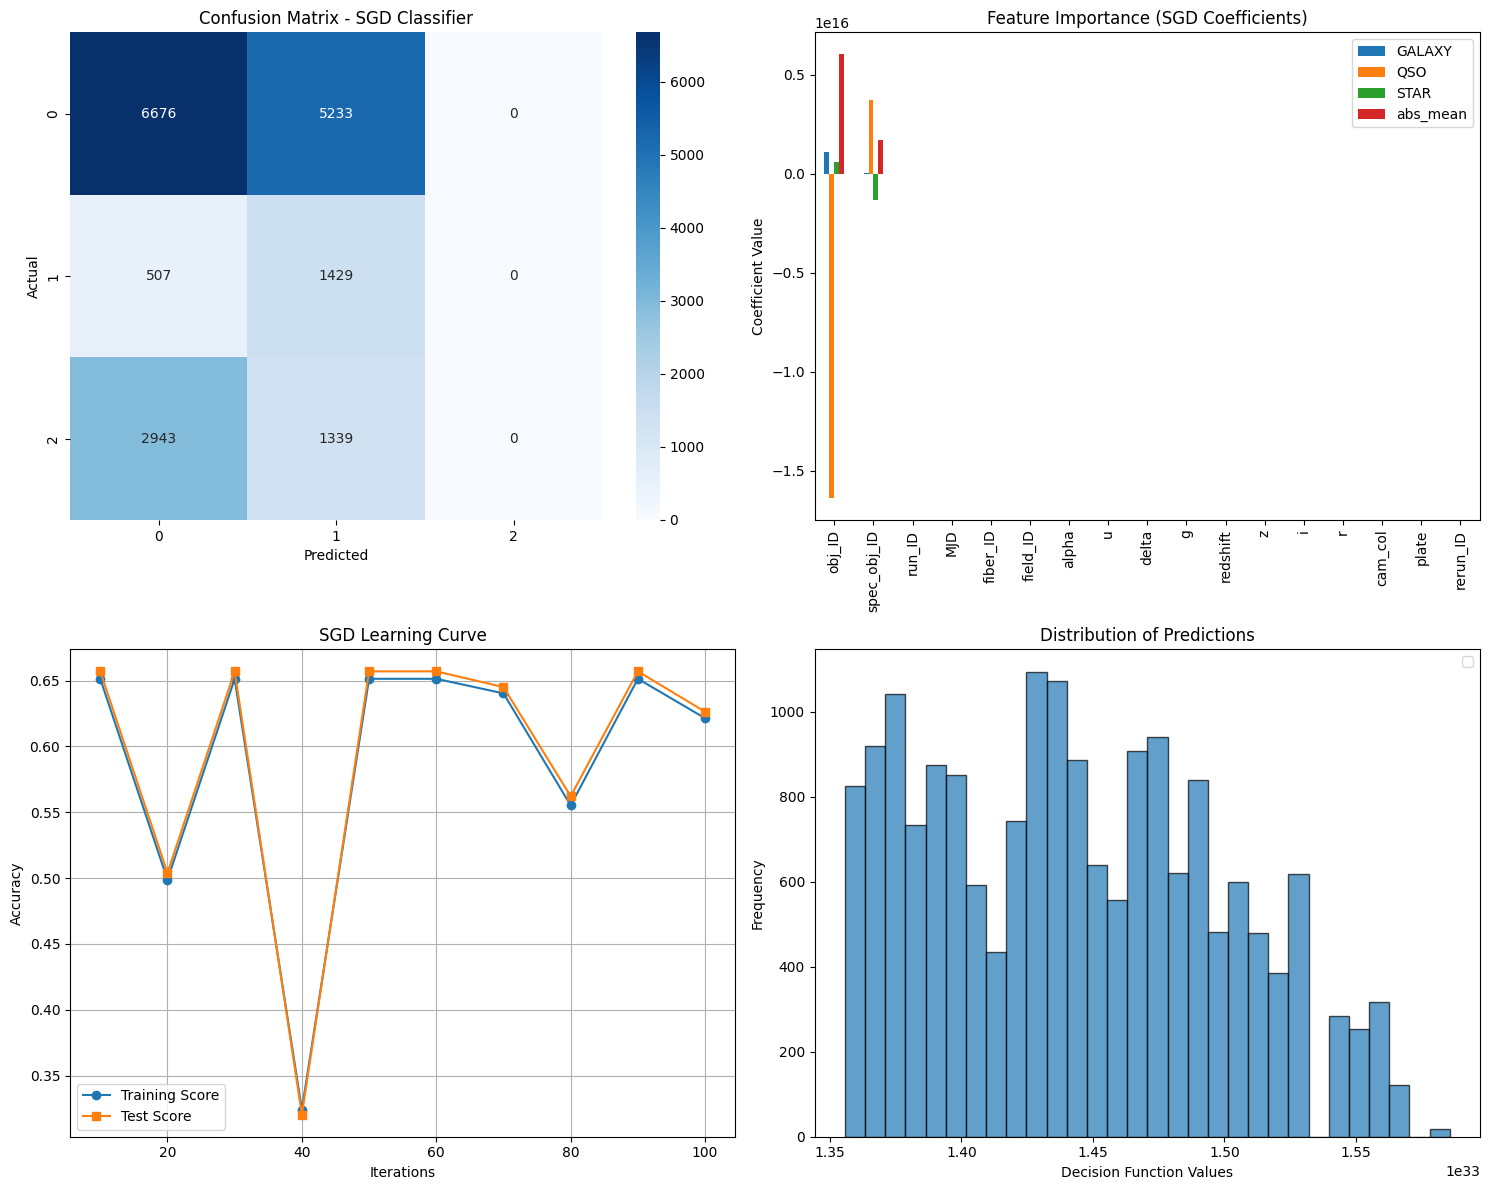

In [21]:
# train model
sgd_model = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3, class_weight="balanced")
sgd_model.fit(Xt, yt)

# prediction
y_pred = sgd_model.predict(X)

# Evaluate
accuracy = accuracy_score(y, y_pred)
print(f"SGD Classifier Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y, y_pred))

# plot model results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - SGD Classifier')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 2. Feature Importance (coefficients)
feature_names = X.columns
coef = sgd_model.coef_

if len(y.unique()) == 2:  # Binary classification
    importance = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coef[0]
    })
else:  # Multiclass classification
    importance = pd.DataFrame(coef.T, columns=sgd_model.classes_, index=feature_names)
    importance['abs_mean'] = importance.abs().mean(axis=1)

importance.sort_values('coefficient' if len(y.unique()) == 2 else 'abs_mean', 
                      ascending=False).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Feature Importance (SGD Coefficients)')
axes[0, 1].set_ylabel('Coefficient Value')

# 3. Learning Curve (approximate with training history)
train_scores = []
test_scores = []

# Retrain with partial fits to track learning
sgd_learning = SGDClassifier(random_state=42, warm_start=True, max_iter=1)
for i in range(1, 101):
    sgd_learning.partial_fit(Xt, yt, classes=np.unique(y))
    if i % 10 == 0:
        train_score = sgd_learning.score(Xt, yt)
        test_score = sgd_learning.score(X, y)
        train_scores.append(train_score)
        test_scores.append(test_score)

axes[1, 0].plot(range(10, 101, 10), train_scores, label='Training Score', marker='o')
axes[1, 0].plot(range(10, 101, 10), test_scores, label='Test Score', marker='s')
axes[1, 0].set_xlabel('Iterations')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_title('SGD Learning Curve')
axes[1, 0].legend()
axes[1, 0].grid(True)

# 4. Prediction Distribution
pred_proba = sgd_model.decision_function(X)
if len(y.unique()) == 2:  # Binary case
    axes[1, 1].hist(pred_proba, bins=30, alpha=0.7, edgecolor='black')
    axes[1, 1].axvline(x=0, color='red', linestyle='--', label='Decision Boundary')
else:  # Multiclass case - show distribution for first class
    axes[1, 1].hist(pred_proba[:, 0], bins=30, alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Decision Function Values')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Predictions')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

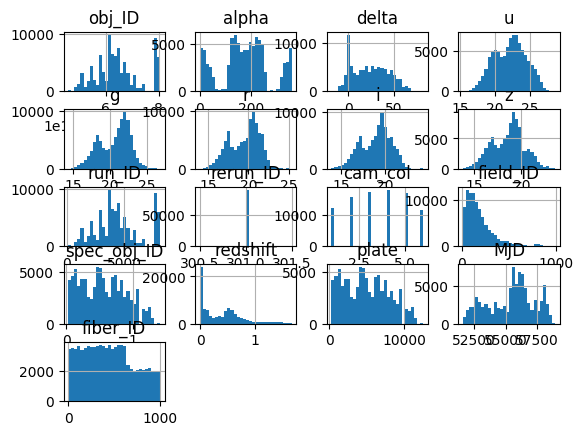

In [22]:
df[feature_names].hist(bins=30)
plt.show()

--- Report for Baseline SVM Model ---
              precision    recall  f1-score   support

      GALAXY       0.96      0.96      0.96      1309
         QSO       0.90      0.76      0.82       215
        STAR       0.94      1.00      0.97       476

    accuracy                           0.95      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.95      0.95      0.95      2000


--- Starting GridSearchCV for SVM (this may take a while) ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits

--- Report for the Best (Tuned) SVM Model with Balancing ---
Best parameters found for SVM: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

      GALAXY       0.98      0.95      0.97      1309
         QSO       0.82      0.89      0.85       215
        STAR       0.97      1.00      0.98       476

    accuracy                           0.96      2000
   macro avg       0.92      0.95      0.93      2

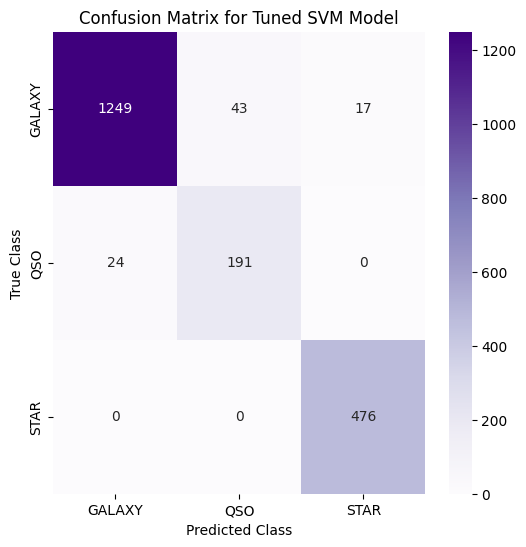


Two most important features: ['u', 'redshift']


d:\School\GB AI\001 Applied Math Concepts for ML\Term Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


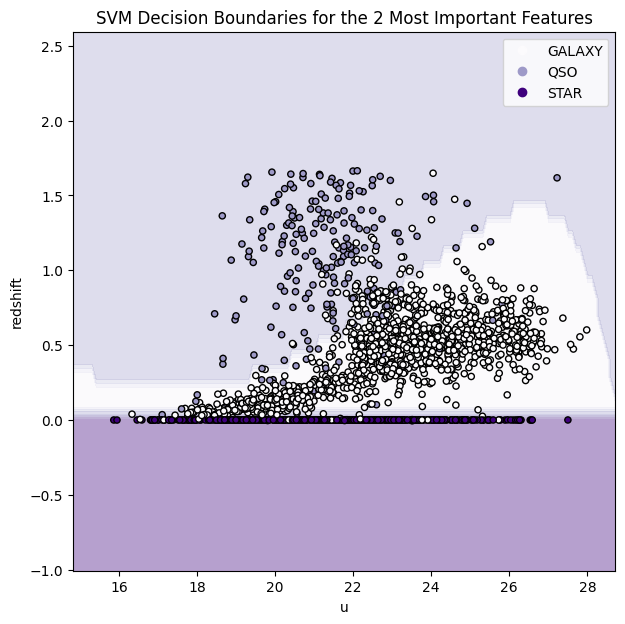

In [23]:
# APPENDIX 1 SVM Model Khoroshilova Elizaveta
# ==============================================================================
# --- 1. Library Imports ---
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# ==============================================================================
# --- 2. Data Cleaning and Sampling ---
# ==============================================================================
# This code assumes you have a DataFrame named 'df' loaded with your data.

# Drop identifier columns and save the clean dataframe
df_cleaned = df.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'])

# Create a specific sample for the SVM model to avoid conflicts with other models
# CHANGED: Sample size increased from 5000 to 10000
df_sample_svm = df_cleaned.sample(n=10000, random_state=42)


# ==============================================================================
# --- 3. Preprocessing for SVM ---
# ==============================================================================

# Create features (X) and target (y) specifically for SVM
X_svm = df_sample_svm.drop(columns=['class'])
y_text_svm = df_sample_svm['class']

# Encode the target variable for SVM
label_encoder_svm = LabelEncoder()
y_svm = label_encoder_svm.fit_transform(y_text_svm)

# Split the data into training and testing sets for SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.2, random_state=42, stratify=y_svm
)

# Scale the features for SVM (fitting the scaler only on SVM training data)
scaler_svm = StandardScaler()
X_train_scaled_svm = scaler_svm.fit_transform(X_train_svm)
X_test_scaled_svm = scaler_svm.transform(X_test_svm)


# ==============================================================================
# --- 4. Baseline SVM Model Training (for comparison) ---
# ==============================================================================
print("--- Report for Baseline SVM Model ---")
svm_model_basic = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model_basic.fit(X_train_scaled_svm, y_train_svm)
y_pred_basic_svm = svm_model_basic.predict(X_test_scaled_svm)
print(classification_report(y_test_svm, y_pred_basic_svm, target_names=label_encoder_svm.classes_))


# ==============================================================================
# --- 5. Hyperparameter Tuning with GridSearchCV for SVM ---
# ==============================================================================
print("\n--- Starting GridSearchCV for SVM (this may take a while) ---")
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf']
}

# Initialize the search with an SVC model that includes class balancing
grid_search_svm = GridSearchCV(
    SVC(random_state=42, class_weight='balanced'),
    param_grid_svm,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Run the search
grid_search_svm.fit(X_train_scaled_svm, y_train_svm)


# ==============================================================================
# --- 6. Analysis of the Best Tuned SVM Model ---
# ==============================================================================
print("\n--- Report for the Best (Tuned) SVM Model with Balancing ---")
print("Best parameters found for SVM:", grid_search_svm.best_params_)

best_svm = grid_search_svm.best_estimator_
y_pred_tuned_svm = best_svm.predict(X_test_scaled_svm)
print(classification_report(y_test_svm, y_pred_tuned_svm, target_names=label_encoder_svm.classes_))


# ==============================================================================
# --- 7. Visual Error Analysis (Confusion Matrix) ---
# ==============================================================================
print("\n--- Confusion Matrix for the Best SVM Model ---")
# Build the confusion matrix
cm_svm = confusion_matrix(y_test_svm, y_pred_tuned_svm)

# Visualize with a heatmap for clarity
# CHANGED: Figure size reduced for better fit
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=label_encoder_svm.classes_,
            yticklabels=label_encoder_svm.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Tuned SVM Model')
plt.show()


# ==============================================================================
# --- 8. Decision Boundary Visualization (Advanced Analysis) ---
# ==============================================================================
# Since SVM with 'rbf' kernel doesn't directly show feature importance,
# we can use Random Forest as a helper tool to estimate them.
rf_for_features = RandomForestClassifier(random_state=42)
rf_for_features.fit(X_train_scaled_svm, y_train_svm)
importances = rf_for_features.feature_importances_

# Find the two most important features
top2_indices = np.argsort(importances)[-2:]
top2_features = X_svm.columns[top2_indices]
print(f"\nTwo most important features: {top2_features.tolist()}")

# Train an SVM on only these two features for visualization
svm_2d = SVC(C=100, gamma='scale', class_weight='balanced', random_state=42)
svm_2d.fit(X_train_svm[top2_features], y_train_svm)

# Create a mesh grid to plot the decision boundaries
x_min, x_max = X_train_svm[top2_features[0]].min() - 1, X_train_svm[top2_features[0]].max() + 1
y_min, y_max = X_train_svm[top2_features[1]].min() - 1, X_train_svm[top2_features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(7, 7))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Purples')
scatter = plt.scatter(X_test_svm[top2_features[0]], X_test_svm[top2_features[1]], c=y_test_svm, s=20, edgecolor='k', cmap='Purples')
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title('SVM Decision Boundaries for the 2 Most Important Features')
plt.legend(handles=scatter.legend_elements()[0], labels=label_encoder_svm.classes_.tolist())
plt.show()

# --- End of SVM Code Block ---